In [1]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os.path

import numpy as np
from matplotlib import pyplot as plt

My trial

In [5]:
import importlib
#import models

In [11]:
import utils
import models
#importlib.reload(utils)

In [91]:
importlib.reload(utils)

<module 'utils' from 'D:\\Resource\\Courses\\UCSD\\2nd_Quarter\\253\\pa4\\DeepMusic\\utils.py'>

In [81]:
data = utils.get_data()
char2idx_dict, idx2char_dict = utils.get_dicts(data)

In [103]:
lstm = models.Music(voc_size=len(char2idx_dict), hidden_size=100, num_layers=1)

In [105]:
coach = utils.Trainer(lstm, char2idx_dict, idx2char_dict)

In [119]:
loss = coach.fit(data, max_iter=3000, log_freq=500)

epoch 500, loss 1.717
epoch 1000, loss 2.117
epoch 1500, loss 1.836
epoch 2000, loss 0.871
epoch 2500, loss 1.566
epoch 3000, loss 1.830


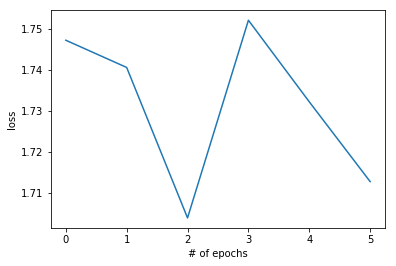

In [120]:
plt.plot([i for i in range(len(loss))], loss)
plt.xlabel('# of epochs')
plt.ylabel('loss')
#plt.legend()
plt.show()

In [123]:
tune = "<start>\n" + coach.inference(size=200, temp=.6)
print(tune)

<start>

X:49
T:Cornpipe-56
M:6/8
K:G
B2 dB cA|BG G2|GBd e2f|g2 e2|
f2f2 e2f2|
f2ed cBAG|BAGA B2cB|c2d2 A2B2|d2e2 d4|
d2c2B2|A4G2 | G4 | G4G3 | G3 A2F2 | B2 A2 | B>cd>e | B2e2 | e2 dc>B c>d B>c d2 | e2d>e>d |
